## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



Your Name : Umur Türkay

In [50]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


In [51]:
BaseYear = 1966
degree = 3

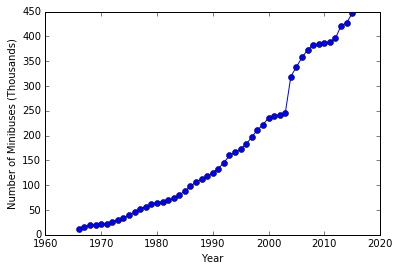

In [52]:
#x and y matrices for minibuses
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Minibus[0:]).T/1000

#Plottting data for minibuses
plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Minibuses (Thousands)')

plt.show()

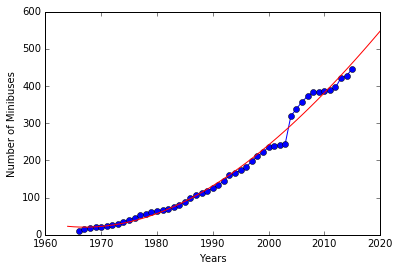

In [53]:
#Fitting a polynomial for minibus data

# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(-2,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Minibuses')

plt.show()

In [54]:
#Predicted number of minibuses for the years 2016, 2017, 2018, 2019 and 2020 (thousands) by polynomial model
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of minibuses for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of minibuses for the year 2016 is [[ 468.75542497]]
Predicted number of minibuses for the year 2017 is [[ 488.01194612]]
Predicted number of minibuses for the year 2018 is [[ 507.56514822]]
Predicted number of minibuses for the year 2019 is [[ 527.40802946]]
Predicted number of minibuses for the year 2020 is [[ 547.53358804]]


Auto regression model


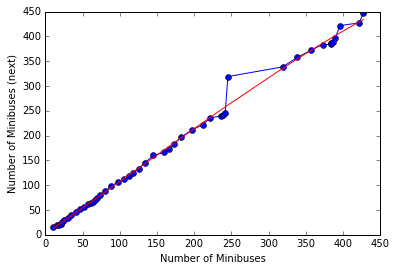

In [55]:
#Autoregression model for minibus data
    
x = np.matrix(df_arac.Minibus[0:-1]).T/1000
y_train_ar = np.matrix(df_arac.Minibus[1:]).T/1000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.Minibus[-1:]/1000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of Minibuses')
plt.ylabel('Number of Minibuses (next)')
plt.plot(x, f_ar, 'r')
plt.show()



In [56]:
#Predicted number of minibuses for the years 2016, 2017, 2018, 2019 and 2020 (thousands) by autoregression model
predictionStartYear = 2016
print ("Predicted number of minibuses for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of minibuses for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of minibuses for the year 2016 is [[ 449.83509046]]
Predicted number of minibuses for the year 2017 is [[ 452.23334594]]
Predicted number of minibuses for the year 2018 is [[ 454.13095322]]
Predicted number of minibuses for the year 2019 is [[ 455.62528981]]
Predicted number of minibuses for the year 2020 is [[ 456.79759352]]


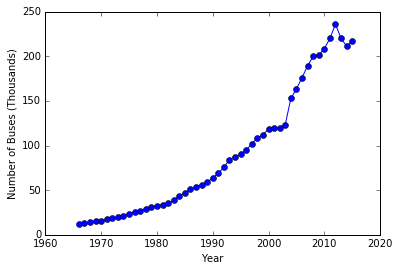

In [57]:
#x and y matrices for buses
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Bus[0:]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Buses (Thousands)')

plt.show()

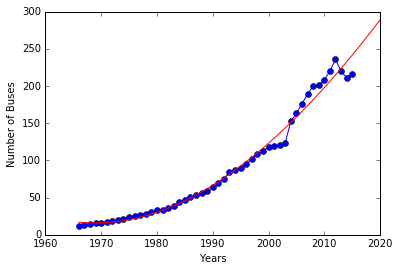

In [58]:
# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Buses')

plt.show()

In [59]:
#Predicted number of buses for the years 2016, 2017, 2018, 2019 and 2020 (thousands) by polynomial model
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of buses for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of buses for the year 2016 is [[ 246.91394259]]
Predicted number of buses for the year 2017 is [[ 257.15325109]]
Predicted number of buses for the year 2018 is [[ 267.57578971]]
Predicted number of buses for the year 2019 is [[ 278.17901269]]
Predicted number of buses for the year 2020 is [[ 288.96037428]]


Auto regression model


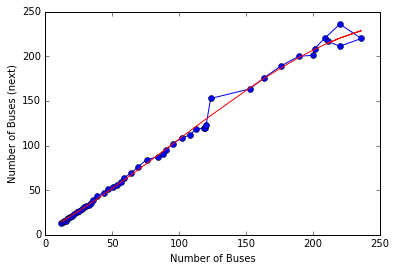

In [60]:
#Autoregression model for bus data

x = np.matrix(df_arac.Bus[0:-1]).T/1000
y_train_ar = np.matrix(df_arac.Bus[1:]).T/1000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.Bus[-1:]/1000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of Buses')
plt.ylabel('Number of Buses (next)')
plt.plot(x, f_ar, 'r')
plt.show()

In [61]:
#Predicted number of buses for the years 2016, 2017, 2018, 2019 and 2020 (thousands) by autoregression model
predictionStartYear = 2016
print ("Predicted number of buses for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of buses for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of buses for the year 2016 is [[ 218.28471762]]
Predicted number of buses for the year 2017 is [[ 219.338733]]
Predicted number of buses for the year 2018 is [[ 219.97276007]]
Predicted number of buses for the year 2019 is [[ 220.34958315]]
Predicted number of buses for the year 2020 is [[ 220.57190726]]


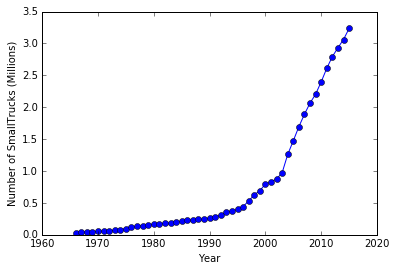

In [62]:
#x and y matrices for small trucks
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SmallTruck[0:]).T/1000000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of SmallTrucks (Millions)')

plt.show()

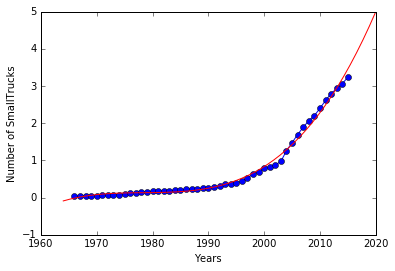

In [63]:
# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(-2,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of SmallTrucks')

plt.show()

In [64]:
#Predicted number of small trucks for the years 2016, 2017, 2018, 2019 and 2020 (millions) by polynomial model
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of small trucks for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of small trucks for the year 2016 is [[ 3.57216222]]
Predicted number of small trucks for the year 2017 is [[ 3.89746786]]
Predicted number of small trucks for the year 2018 is [[ 4.24276453]]
Predicted number of small trucks for the year 2019 is [[ 4.60865125]]
Predicted number of small trucks for the year 2020 is [[ 4.99572705]]


Auto regression model


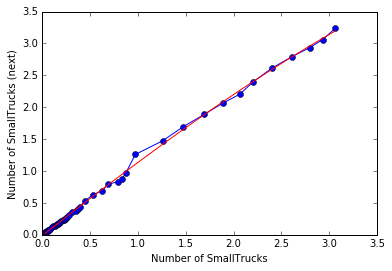

In [66]:
#Autoregression model for small truck data

x = np.matrix(df_arac.SmallTruck[0:-1]).T/1000000
y_train_ar = np.matrix(df_arac.SmallTruck[1:]).T/1000000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.SmallTruck[-1:]/1000000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of SmallTrucks')
plt.ylabel('Number of SmallTrucks (next)')
plt.plot(x, f_ar, 'r')
plt.show()

In [67]:
#Predicted number of SmallTrucks for the years 2016, 2017, 2018, 2019 and 2020 (millions) by autoregression model
predictionStartYear = 2016
print ("Predicted number of SmallTrucks for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of SmallTrucks for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of SmallTrucks for the year 2016 is [[ 3.34072339]]
Predicted number of SmallTrucks for the year 2017 is [[ 3.42719908]]
Predicted number of SmallTrucks for the year 2018 is [[ 3.49669642]]
Predicted number of SmallTrucks for the year 2019 is [[ 3.55159097]]
Predicted number of SmallTrucks for the year 2020 is [[ 3.59433842]]


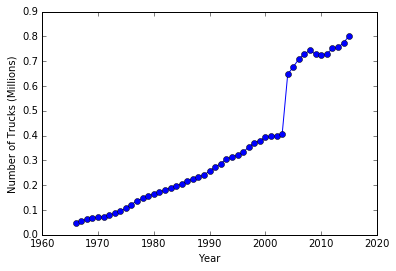

In [68]:
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Truck[0:]).T/1000000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Trucks (Millions)')

plt.show()

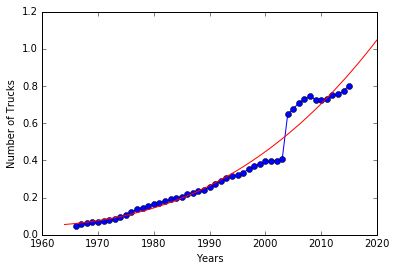

In [69]:
# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(-2,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Trucks')

plt.show()

In [70]:
#Predicted number of trucks for the years 2016, 2017, 2018, 2019 and 2020 (millions) by polynomial model
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of trucks for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of trucks for the year 2016 is [[ 0.87959106]]
Predicted number of trucks for the year 2017 is [[ 0.91981992]]
Predicted number of trucks for the year 2018 is [[ 0.96126848]]
Predicted number of trucks for the year 2019 is [[ 1.00395379]]
Predicted number of trucks for the year 2020 is [[ 1.04789288]]


Auto regression model


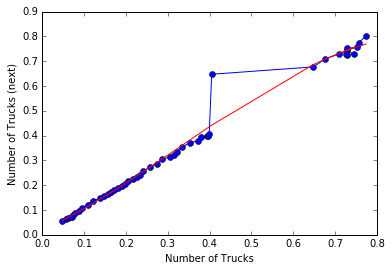

In [71]:
#Autoregression model for truck data

x = np.matrix(df_arac.Truck[0:-1]).T/1000000
y_train_ar = np.matrix(df_arac.Truck[1:]).T/1000000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.Truck[-1:]/1000000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of Trucks')
plt.ylabel('Number of Trucks (next)')
plt.plot(x, f_ar, 'r')
plt.show()

In [72]:
#Predicted number of Trucks for the years 2016, 2017, 2018, 2019 and 2020 (millions) by autoregression model
predictionStartYear = 2016
print ("Predicted number of Trucks for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of Trucks for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of Trucks for the year 2016 is [[ 0.78186427]]
Predicted number of Trucks for the year 2017 is [[ 0.7730241]]
Predicted number of Trucks for the year 2018 is [[ 0.76884913]]
Predicted number of Trucks for the year 2019 is [[ 0.7667946]]
Predicted number of Trucks for the year 2020 is [[ 0.76576425]]


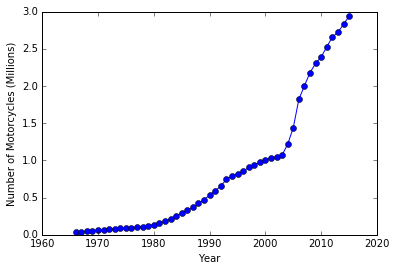

In [73]:
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Motorcycle[0:]).T/1000000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Motorcycles (Millions)')

plt.show()

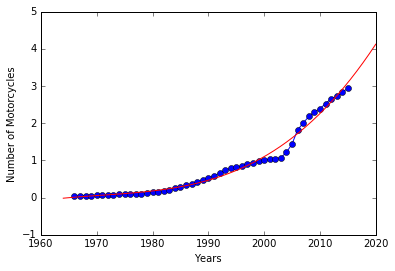

In [74]:
# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(-2,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Motorcycles')

plt.show()

In [75]:
#Predicted number of motorcycles for the years 2016, 2017, 2018, 2019 and 2020 (millions) by polynomial model
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of motorcycles for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of motorcycles for the year 2016 is [[ 3.17224276]]
Predicted number of motorcycles for the year 2017 is [[ 3.39355888]]
Predicted number of motorcycles for the year 2018 is [[ 3.62563211]]
Predicted number of motorcycles for the year 2019 is [[ 3.86873151]]
Predicted number of motorcycles for the year 2020 is [[ 4.12312614]]


Auto regression model


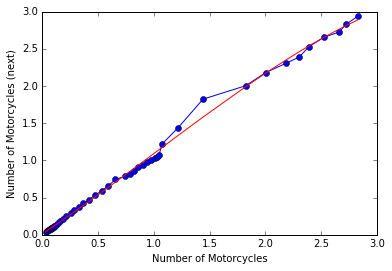

In [76]:
#Autoregression model for motorcycle data

x = np.matrix(df_arac.Motorcycle[0:-1]).T/1000000
y_train_ar = np.matrix(df_arac.Motorcycle[1:]).T/1000000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.Motorcycle[-1:]/1000000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of Motorcycles')
plt.ylabel('Number of Motorcycles (next)')
plt.plot(x, f_ar, 'r')
plt.show()

In [77]:
#Predicted number of Motorcycles for the years 2016, 2017, 2018, 2019 and 2020 (millions) by autoregression model
predictionStartYear = 2016
print ("Predicted number of Motorcycles for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of Motorcycles for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of Motorcycles for the year 2016 is [[ 2.96432807]]
Predicted number of Motorcycles for the year 2017 is [[ 2.98094379]]
Predicted number of Motorcycles for the year 2018 is [[ 2.99159855]]
Predicted number of Motorcycles for the year 2019 is [[ 2.99836009]]
Predicted number of Motorcycles for the year 2020 is [[ 3.00262213]]


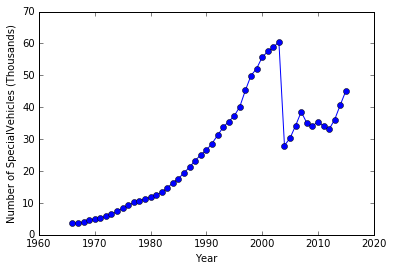

In [78]:
x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SpecialVehicles[0:]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of SpecialVehicles (Thousands)')

plt.show()

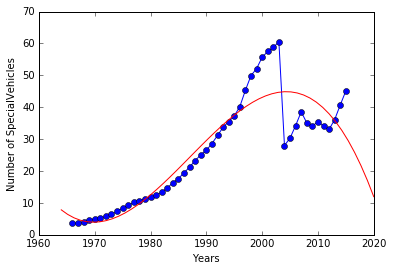

In [79]:
# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(-2,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of SpecialVehicles')

plt.show()

In [80]:
#Predicted number of special vehicles for the years 2016, 2017, 2018, 2019 and 2020 (thousands)
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of special vehicles for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of special vehicles for the year 2016 is [[ 29.49692753]]
Predicted number of special vehicles for the year 2017 is [[ 25.8212394]]
Predicted number of special vehicles for the year 2018 is [[ 21.68560426]]
Predicted number of special vehicles for the year 2019 is [[ 17.07220098]]
Predicted number of special vehicles for the year 2020 is [[ 11.96320843]]


Auto regression model


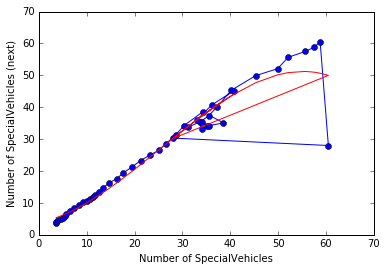

In [81]:
#Autoregression model for special vehicles data

x = np.matrix(df_arac.SpecialVehicles[0:-1]).T/1000
y_train_ar = np.matrix(df_arac.SpecialVehicles[1:]).T/1000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.SpecialVehicles[-1:]/1000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of SpecialVehicles')
plt.ylabel('Number of SpecialVehicles (next)')
plt.plot(x, f_ar, 'r')
plt.show()

In [82]:
#Predicted number of SpecialVehicles for the years 2016, 2017, 2018, 2019 and 2020 (millions) by autoregression model
predictionStartYear = 2016
print ("Predicted number of SpecialVehicles for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of SpecialVehicles for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of SpecialVehicles for the year 2016 is [[ 47.57490331]]
Predicted number of SpecialVehicles for the year 2017 is [[ 49.07495689]]
Predicted number of SpecialVehicles for the year 2018 is [[ 49.82040718]]
Predicted number of SpecialVehicles for the year 2019 is [[ 50.13680488]]
Predicted number of SpecialVehicles for the year 2020 is [[ 50.25984944]]


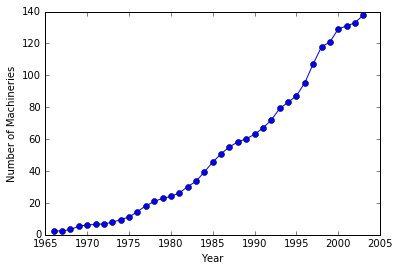

In [83]:
x = np.matrix(df_arac.Year[0:38]).T-BaseYear
y = np.matrix(df_arac.Machinery[0:38]).T/1000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Machineries')

plt.show()

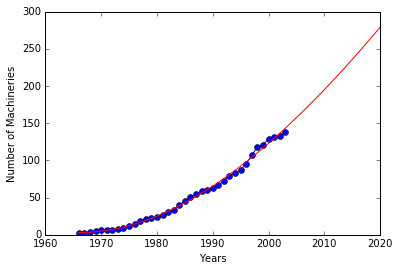

In [84]:
# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(0,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Machineries')

plt.show()

In [85]:
#Predicted number of machineries for the years 2016, 2017, 2018, 2019 and 2020 (thousands) by polynomial model
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of machineries for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of machineries for the year 2016 is [[ 240.75789743]]
Predicted number of machineries for the year 2017 is [[ 250.13688148]]
Predicted number of machineries for the year 2018 is [[ 259.63538804]]
Predicted number of machineries for the year 2019 is [[ 269.24967753]]
Predicted number of machineries for the year 2020 is [[ 278.97601039]]


Auto regression model


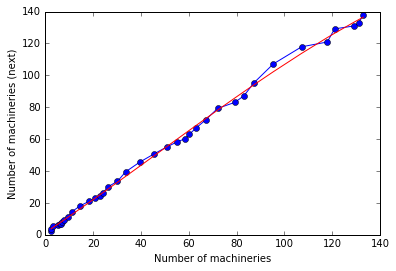

In [86]:
#Autoregression model for machineries data

x = np.matrix(df_arac.Machinery[0:37]).T/1000
y_train_ar = np.matrix(df_arac.Machinery[1:38]).T/1000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.Machinery[37]/1000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of machineries')
plt.ylabel('Number of machineries (next)')
plt.plot(x, f_ar, 'r')
plt.show()

In [87]:
#Predicted number of machineries for the years 2016, 2017, 2018, 2019 and 2020 (thousands) by autoregression model
predictionStartYear = 2016
print ("Predicted number of machineries for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of machineries for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of machineries for the year 2016 is [[ 140.4508572]]
Predicted number of machineries for the year 2017 is [[ 142.37340833]]
Predicted number of machineries for the year 2018 is [[ 143.81128322]]
Predicted number of machineries for the year 2019 is [[ 144.86926458]]
Predicted number of machineries for the year 2020 is [[ 145.63806445]]


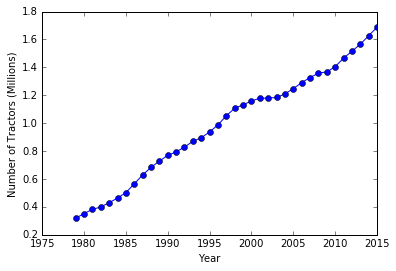

In [88]:
x = np.matrix(df_arac.Year[13:]).T-BaseYear
y = np.matrix(df_arac.Tractor[13:]).T/1000000

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Tractors (Millions)')

plt.show()

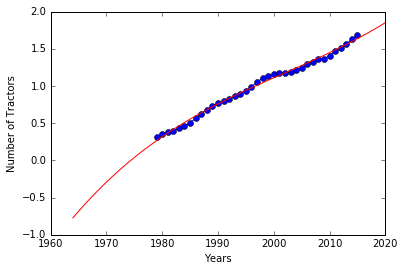

In [89]:
# Setup the vandermonde matrix
N = len(x)
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))
xx = np.matrix(np.linspace(-2,54)).T
A2 = np.hstack((np.power(xx,i) for i in range(degree+1)))

#plt.imshow(A, interpolation='nearest')
# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

f = A2*w_ls
plt.plot(x+BaseYear, y, 'o-')
plt.plot(xx+BaseYear, f, 'r')


plt.xlabel('Years')
plt.ylabel('Number of Tractors')

plt.show()

In [90]:
#Predicted number of tractors for the years 2016, 2017, 2018, 2019 and 2020 (millions) by polynomial model
predictionStartYear = 2016
size = f.shape[0]
for p in range(size-5, size):
    print ("Predicted number of tractors for the year",predictionStartYear,"is",f[p])
    predictionStartYear = predictionStartYear+1

Predicted number of tractors for the year 2016 is [[ 1.65413573]]
Predicted number of tractors for the year 2017 is [[ 1.7010711]]
Predicted number of tractors for the year 2018 is [[ 1.7495253]]
Predicted number of tractors for the year 2019 is [[ 1.79961465]]
Predicted number of tractors for the year 2020 is [[ 1.85145547]]


Auto regression model


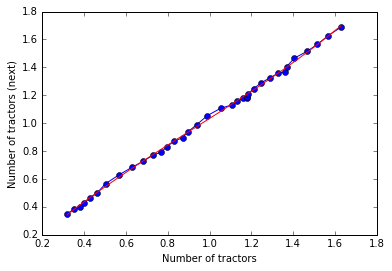

In [91]:
#Autoregression model for tractors data

x = np.matrix(df_arac.Tractor[13:-1]).T/1000000
y_train_ar = np.matrix(df_arac.Tractor[14:]).T/1000000

A_ar = np.hstack((np.power(x,i) for i in range(degree+1)))

w_ar,E,rank,sigma = np.linalg.lstsq(A_ar, y_train_ar)
f_ar = A_ar*w_ar

x_ar_test = np.matrix(df_arac.Tractor[-1:]/1000000)
A2 = np.hstack((np.power(x_ar_test,i) for i in range(degree+1)))

print("Auto regression model")
plt.plot(x, y_train_ar, 'o-')
plt.xlabel('Number of tractors')
plt.ylabel('Number of tractors (next)')
plt.plot(x, f_ar, 'r')
plt.show()

In [92]:
#Predicted number of tractors for the years 2016, 2017, 2018, 2019 and 2020 (millions) by autoregression model
predictionStartYear = 2016
print ("Predicted number of tractors for the year",predictionStartYear,"is",A2*w_ar)
    
for p in range(0,4):
    A2 = np.hstack((np.power(A2*w_ar,i) for i in range(degree+1)))
    print ("Predicted number of tractors for the year",predictionStartYear+1,"is",A2*w_ar)
    predictionStartYear = predictionStartYear+1

Predicted number of tractors for the year 2016 is [[ 1.77399593]]
Predicted number of tractors for the year 2017 is [[ 1.88851868]]
Predicted number of tractors for the year 2018 is [[ 2.05151647]]
Predicted number of tractors for the year 2019 is [[ 2.30881921]]
Predicted number of tractors for the year 2020 is [[ 2.78648414]]
